# Constructing hypothesis testing

## Introduction

ROA(Repair Our Air) is formulating policy recommendations to improve the air quality in America, using the Environmental Protection Agency's Air Quality Index (AQI) to guide their decision making. An AQI value close to 0 signals "little to no" public health concern, while higher values are associated with increased risk to public health.

They've tasked us with leveraging AQI data to help them prioritize their strategy for improving air quality in America.

ROA is considering the following decisions. For each, construct a hypothesis test and use the results of that test to make a recommendation:

1. ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.
2. With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?
3. A new policy will affect those states with a mean AQI of 10 or greater. Would Michigan be affected by this new policy?

**Notes:**
1. We'll default to a 5% level of significance.
2. For two-sample t-tests, use Welch's t-test (i.e., setting the `equal_var` parameter to `False` in `scipy.stats.ttest_ind()`). This will account for the possibly unequal variances between the two groups in the comparison.

## Step 1: Imports


#### Import Packages

In [23]:
# Import relevant packages

import pandas as pd
import numpy as np

# To conduct your hypothesis testing
from scipy import stats

We are provided with a dataset with national Air Quality Index (AQI) measurements by state over time for this analysis.

**Note:** For purposes of our analysis, we can assume this data is randomly sampled from a larger population.

#### Load Dataset

In [25]:
# Use read_csv() to import your data

aqi = pd.read_csv("C:/Users/Sajindra/Files/c4_epa_air_quality.csv")

## Step 2: Data Exploration

### Before proceeding to your deliverables, explore your datasets.

Use the following space to surface descriptive statistics about your data. In particular, explore whether you believe the research questions you were given are readily answerable with this data.

In [3]:
# Explore your dataframe `aqi` here:

aqi.head()

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
0,0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,0.473684,7
1,1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,0.263158,5
2,2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,0.111111,2
3,3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,0.300000,3
4,4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,0.215789,3


In [4]:
# check the shape of dataframe
aqi.shape

(260, 10)

In [5]:
# check descriptive statistics

aqi.describe(include='all')

,Unnamed: 0,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,arithmetic_mean,aqi
count,260.000000,260,260,260,260,257,260,260,260.000000,260.000000
unique,NaN,1,52,149,190,253,1,1,NaN,NaN
top,NaN,2018-01-01,California,Los Angeles,Not in a city,Kapolei,Carbon monoxide,Parts per million,NaN,NaN
freq,NaN,260,66,14,21,2,260,260,NaN,NaN
mean,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403169,6.757692
std,75.199734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.317902,7.061707
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000,2.000000
50%,129.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276315,5.000000
75%,194.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516009,9.000000


In [6]:
# show state value counts

print(aqi['state_name'].value_counts())

state_name
California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska         

Note:
- We have county-level data for the first hypothesis.
- Ohio and New York both have a higher number of observations to work with in this dataset.

## Step 3. Statistical Tests

Before you proceed, recall the following steps for conducting hypothesis testing:

1. Formulate the null hypothesis and the alternative hypothesis.<br>
2. Set the significance level.<br>
3. Determine the appropriate test procedure.<br>
4. Compute the p-value.<br>
5. Draw your conclusion.

### Hypothesis 1: ROA is considering a metropolitan-focused approach. Within California, they want to know if the mean AQI in Los Angeles County is statistically different from the rest of California.

Before proceeding with the analysis, it will be helpful to subset the data for your comparison.

In [8]:
# Create dataframes for each sample being compared in your test

ca_la = aqi[aqi['county_name']=='Los Angeles']
ca_other = aqi[(aqi['state_name']=='California') & (aqi['county_name']!='Los Angeles')]

#### Formulate your hypothesis:

Formulate your null and alternative hypotheses:

*   $H_0$: There is no difference in the mean AQI between Los Angeles County and the rest of California.
*   $H_A$: There is a difference in the mean AQI between Los Angeles County and the rest of California.


#### Set the significance level:
Significance level is the threshold at which you will consider results statistically significant. The significance level is also the probability of rejecting the null hypothesis when it is true. Usually 5% used.

In [9]:
# For this analysis, the significance level is 5%

significance_level = 0.05
significance_level

0.05

#### Determine the appropriate test procedure:

Here, we are comparing the sample means between two independent samples. Therefore, we will utilize a **two-sample  𝑡-test**.

#### Compute the p-value
 p-value refers to the probability of observing results as or more extreme than those observed when the null hypothesis is true. 
 This can be found by calculating sample statistic. 
 
 Sample statistic 't':
 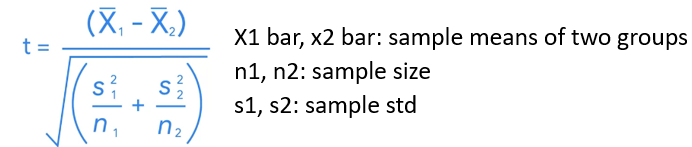
 
 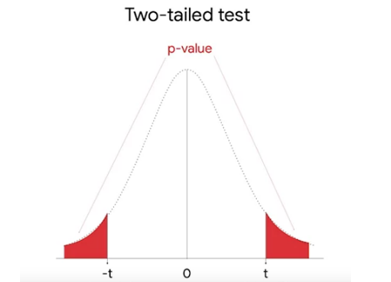

In [10]:
# Compute your p-value using built-in function

stats.ttest_ind(a=ca_la['aqi'], b=ca_other['aqi'], equal_var=False)

#if equal_var is specified then the test statistic is based on a single estimate of variance calculated across 
#the whole pool of data (both samples)

# by default argument 'alternative' = '‘two-sided’: the means of the distributions underlying the samples are unequal.'
#‘less’: the mean of the distribution underlying the first sample < mean of the distribution underlying the second sample.
#‘greater’: the mean of the distribution underlying the first sample > mean of the distribution underlying the second sample.

TtestResult(statistic=2.1107010796372014, pvalue=0.049839056842410995, df=17.08246830361151)

Note: With a p-value (0.049) being less than 0.05 (as your significance level is 5%), reject the null hypothesis in favor of the alternative hypothesis. ie. there is a difference in the mean AQI between Los Angeles County and the rest of California.

Therefore, a metropolitan strategy may make sense in this case.

### Hypothesis 2: With limited resources, ROA has to choose between New York and Ohio for their next regional office. Does New York have a lower AQI than Ohio?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [12]:
# Create dataframes for each sample being compared in your test


ny = aqi[aqi['state_name']=='New York']
ohio = aqi[aqi['state_name']=='Ohio']

#### Formulate the hypothesis:

*   $H_0$: The mean AQI of New York is greater than or equal to that of Ohio.
*   $H_A$: The mean AQI of New York is **below** that of Ohio.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, we are comparing the sample means between two independent samples in one direction. Therefore, you will utilize a **two-sample  𝑡-test**.

#### Compute the p-value

In [13]:
# Compute your p-value here

tstat, pvalue = stats.ttest_ind(a=ny['aqi'], b=ohio['aqi'], alternative='less', equal_var=False)

# alternative = ‘less’: the mean of the distribution underlying the first sample < mean of the distribution underlying 
# the second sample.

print(tstat)
print(pvalue)

-2.025951038880333
0.03044650269193468


Note: With a p-value (0.030) of less than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-2.036), **reject the null hypothesis in favor of the alternative hypothesis**.

Therefore, you can conclude at the 5% significance level that New York has a lower mean AQI than Ohio.

###  Hypothesis 3: A new policy will affect those states with a mean AQI of 10 or greater. Will Michigan be affected by this new policy?

Before proceeding with your analysis, it will be helpful to subset the data for your comparison.

In [20]:
# Create dataframes for each sample being compared in your test

michigan = aqi[aqi['state_name']=='Michigan']

# check the count of values
michigan['aqi'].count()

9

#### Formulate your hypothesis:

**Formulate your null and alternative hypotheses here:**

*   $H_0$: The mean AQI of Michigan is less than or equal to 10.
*   $H_A$: The mean AQI of Michigan is greater than 10.


#### Significance Level (remains at 5%)

#### Determine the appropriate test procedure:

Here, we are comparing one sample mean relative to a particular value in one direction. Therefore, we will utilize a **one-sample  𝑡-test**.
- one-sample t-test assumes that the population standard deviation is unknown
- T-test is applied when the population variance is unknown, or the sample size is small (n < 30 )

#### Compute the P-value

In [21]:
# Compute p-value here

tstat, pvalue = stats.ttest_1samp(michigan['aqi'], 10, alternative='greater')

# alternative = 'greater' : the mean of the distribution underlying the sample > 10

print(tstat)
print(pvalue)

-1.7395913343286131
0.9399405193140109


Note: With a p-value (0.940) being greater than 0.05 (as your significance level is 5%) and a t-statistic < 0 (-1.74), **fail to reject the null hypothesis**.

Therefore, we cannot conclude at the 5% significance level that Michigan's mean AQI is greater than 10. This implies that Michigan would most likely not be affected by the new policy.

## Step 4. Results and Evaluation


- The results indicated that the AQI in Los Angeles County was in fact different from the rest of California.
- Using a 5% significance level, we can conclude that New York has a lower AQI than Ohio based on the results.
- Based on the tests, we would fail to reject the null hypothesis, meaning we can't conclude that the  Michigan's mean AQI is greater than 10. Thus, it is unlikely that Michigan would be affected by the new policy.

# Conclusion

Even with small sample sizes, the variation within the data is enough to allow you to make statistically significant conclusions. We identified at the 5% significance level that the Los Angeles mean AQI was stastitically different from the rest of California, and that New York does have a lower mean AQI than Ohio. However, we were unable to conclude at the 5% significance level that Michigan's mean AQI was greater than 10.